**TASK 3 - TIME SERIES FORECASTING(CIPHERBYTE)**

**BY URNISHA SARKAR**


**Importing The Important Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Importing The Weather_Data_Kolkata_2015_2020 Dataset**

In [3]:
from google.colab import files
data=files.upload()

Saving weather_data_kolkata_2015_2020.csv to weather_data_kolkata_2015_2020.csv


In [4]:
df=pd.read_csv("weather_data_kolkata_2015_2020.csv")

**Checking The First 5 Rows**

In [5]:
df.head()

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0


**Checking The First 20 Rows**

In [6]:
df.head(20)

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0
5,2015-01-01 05:00:00,20.0,83.0
6,2015-01-01 06:00:00,20.0,84.0
7,2015-01-01 07:00:00,20.0,82.0
8,2015-01-01 08:00:00,21.0,80.0
9,2015-01-01 09:00:00,22.0,78.0


**Checking The Last 5 rows**

In [7]:
df.tail()

,DATETIME,TEMPERATURE,HUMIDITY
52603,2020-12-31 19:00:00,25.0,36.0
52604,2020-12-31 20:00:00,24.0,37.0
52605,2020-12-31 21:00:00,23.0,38.0
52606,2020-12-31 22:00:00,22.0,39.0
52607,2020-12-31 23:00:00,21.0,40.0


**Checking The Last 20 Rows**

In [8]:
df.tail(20)

,DATETIME,TEMPERATURE,HUMIDITY
52588,2020-12-31 04:00:00,20.0,48.0
52589,2020-12-31 05:00:00,20.0,48.0
52590,2020-12-31 06:00:00,20.0,49.0
52591,2020-12-31 07:00:00,21.0,44.0
52592,2020-12-31 08:00:00,23.0,40.0
52593,2020-12-31 09:00:00,24.0,36.0
52594,2020-12-31 10:00:00,25.0,32.0
52595,2020-12-31 11:00:00,26.0,28.0
52596,2020-12-31 12:00:00,28.0,25.0
52597,2020-12-31 13:00:00,28.0,25.0


In [9]:
df

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0
...,...,...,...
52603,2020-12-31 19:00:00,25.0,36.0
52604,2020-12-31 20:00:00,24.0,37.0
52605,2020-12-31 21:00:00,23.0,38.0
52606,2020-12-31 22:00:00,22.0,39.0


**Obtain The Number Of Rows and Columns**

In [10]:
df.shape

(52608, 3)

In [11]:
df.dtypes

DATETIME        object
TEMPERATURE    float64
HUMIDITY       float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATETIME     52608 non-null  object 
 1   TEMPERATURE  52608 non-null  float64
 2   HUMIDITY     52608 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


**Statistical Measures Of the Dataset**

In [13]:
df.describe()

,TEMPERATURE,HUMIDITY
count,52608.000000,52608.000000
mean,28.187633,58.871693
std,4.946404,18.935218
min,11.000000,8.000000
25%,25.000000,44.000000
50%,29.000000,60.000000
75%,31.000000,75.000000
max,45.000000,98.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEMPERATURE,52608.0,28.187633,4.946404,11.0,25.0,29.0,31.0,45.0
HUMIDITY,52608.0,58.871693,18.935218,8.0,44.0,60.0,75.0,98.0


In [15]:
df.isnull().sum()

DATETIME       0
TEMPERATURE    0
HUMIDITY       0
dtype: int64

In [16]:
df.duplicated().sum()

0

**Finding Out Co-Relation**

In [17]:
corr=df.corr()
corr

<ipython-input-17-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,TEMPERATURE,HUMIDITY
TEMPERATURE,1.000000,-0.071982
HUMIDITY,-0.071982,1.000000


**Heat Map**

<ipython-input-18-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

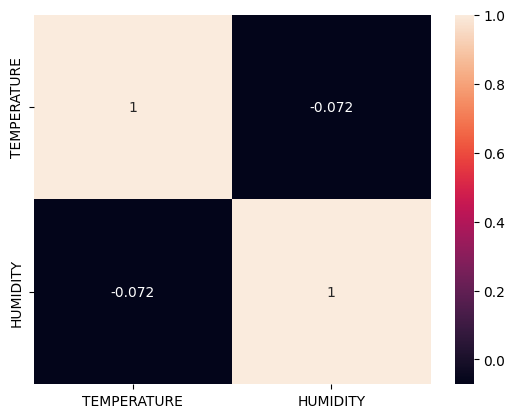

In [18]:
sns.heatmap(df.corr(),annot=True)

**INFERENCE:**

**"TEMPERATURE":**

The typical temperature is roughly 28.19°C.

The standard deviation of temperature is just 4.95°C.

The temperature range is 11.0 to 45.0 degrees Celsius.

Temperatures in the middle 50% range from 25.0°C to 31.0°C.


**"HUMIDITY":**

The relative humidity is about 58.87% on average.

The standard variation of humidity data is greater at roughly 18.94%.

8.0% to 98.0% of the air is humid.

Humidity levels in the middle 50% range from 44.0% to 75.0%.

**DATA PRE - PROCESSING**

In [19]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATETIME     52608 non-null  datetime64[ns]
 1   TEMPERATURE  52608 non-null  float64       
 2   HUMIDITY     52608 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.2 MB


In [21]:
df.head(25)

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0
5,2015-01-01 05:00:00,20.0,83.0
6,2015-01-01 06:00:00,20.0,84.0
7,2015-01-01 07:00:00,20.0,82.0
8,2015-01-01 08:00:00,21.0,80.0
9,2015-01-01 09:00:00,22.0,78.0


**INFERENCE :**

For each date, there are hourly temperature and humidity readings. It is necessary to compute the average values in order to get the date-based mean temperature and mean humidity.


In [22]:
df['DATE'] = df['DATETIME'].dt.date
df

,DATETIME,TEMPERATURE,HUMIDITY,DATE
0,2015-01-01 00:00:00,19.0,75.0,2015-01-01
1,2015-01-01 01:00:00,19.0,77.0,2015-01-01
2,2015-01-01 02:00:00,19.0,78.0,2015-01-01
3,2015-01-01 03:00:00,19.0,80.0,2015-01-01
4,2015-01-01 04:00:00,19.0,81.0,2015-01-01
...,...,...,...,...
52603,2020-12-31 19:00:00,25.0,36.0,2020-12-31
52604,2020-12-31 20:00:00,24.0,37.0,2020-12-31
52605,2020-12-31 21:00:00,23.0,38.0,2020-12-31
52606,2020-12-31 22:00:00,22.0,39.0,2020-12-31


**Calculating the average temperature and humidity for a group of data using the date.**

In [23]:
datewise_df = df.groupby('DATE').agg({'TEMPERATURE': 'mean', 'HUMIDITY': 'mean'}).reset_index()
datewise_df

,DATE,TEMPERATURE,HUMIDITY
0,2015-01-01,20.333333,83.208333
1,2015-01-02,23.041667,76.208333
2,2015-01-03,24.375000,76.750000
3,2015-01-04,23.916667,68.250000
4,2015-01-05,21.250000,51.375000
...,...,...,...
2187,2020-12-27,23.083333,28.583333
2188,2020-12-28,23.958333,30.250000
2189,2020-12-29,24.750000,32.458333
2190,2020-12-30,23.875000,34.125000


In [24]:
datewise_df.shape

(2192, 3)

**DATA VISUALISATION**

In [25]:
fig = px.line(datewise_df, x="DATE",
                 y="TEMPERATURE",
                 title='Temperature of Kolkata Over the Years 2015 - 2020',
                color_discrete_sequence=['blue'])
fig.show()

In [26]:
fig = px.line(datewise_df, x="DATE",
                 y="HUMIDITY",
                 title='Humidity of Kolkata Over the Years',
                color_discrete_sequence=['red'])
fig.show()

**Converting date column to datetime**

In [27]:
datewise_df['DATE'] = pd.to_datetime(datewise_df['DATE'])

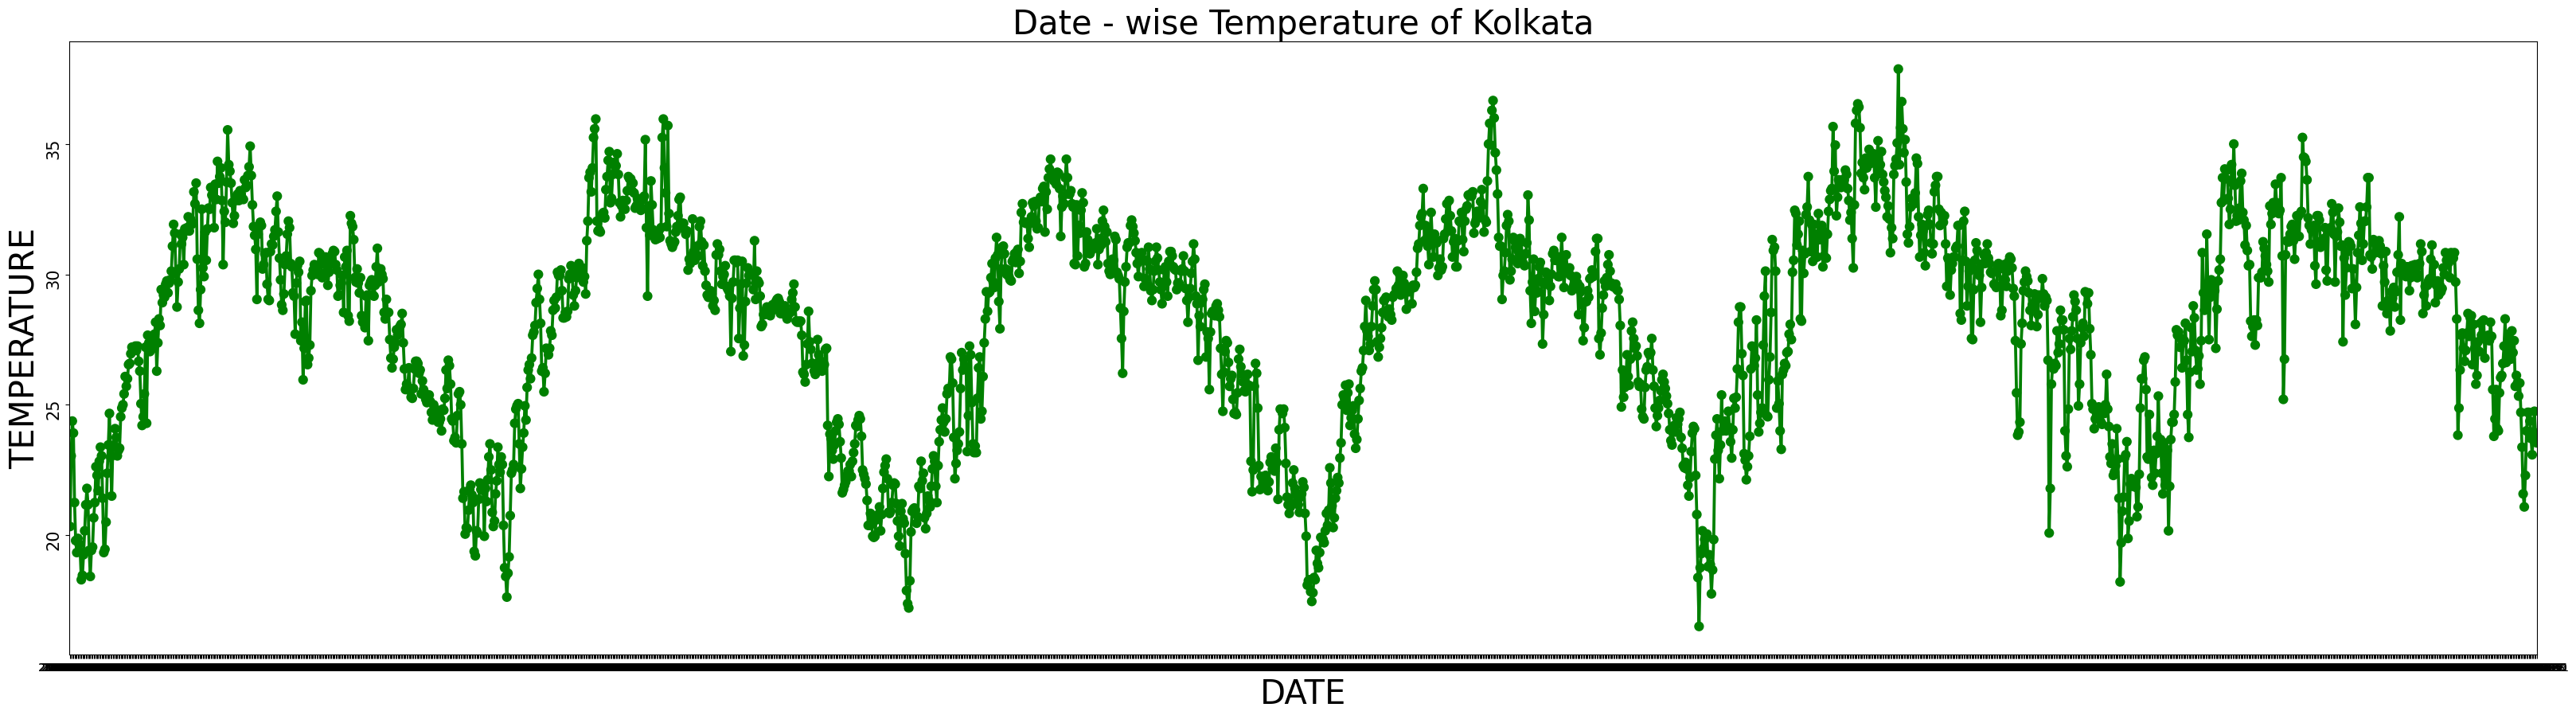

In [28]:
plt.figure(figsize=(40,10))
plt.yticks(rotation = 90,fontsize=15)
plt.xlabel("DATE",fontsize=30)
plt.ylabel("TEMPERATURE",fontsize=30)

plt.title("Date - wise Temperature of Kolkata",fontsize=30)

ax = sns.pointplot(x=datewise_df['DATE'].dt.date, y=datewise_df['TEMPERATURE'], color='g')
ax.set(xlabel="DATE", ylabel="TEMPERATURE")

plt.show()

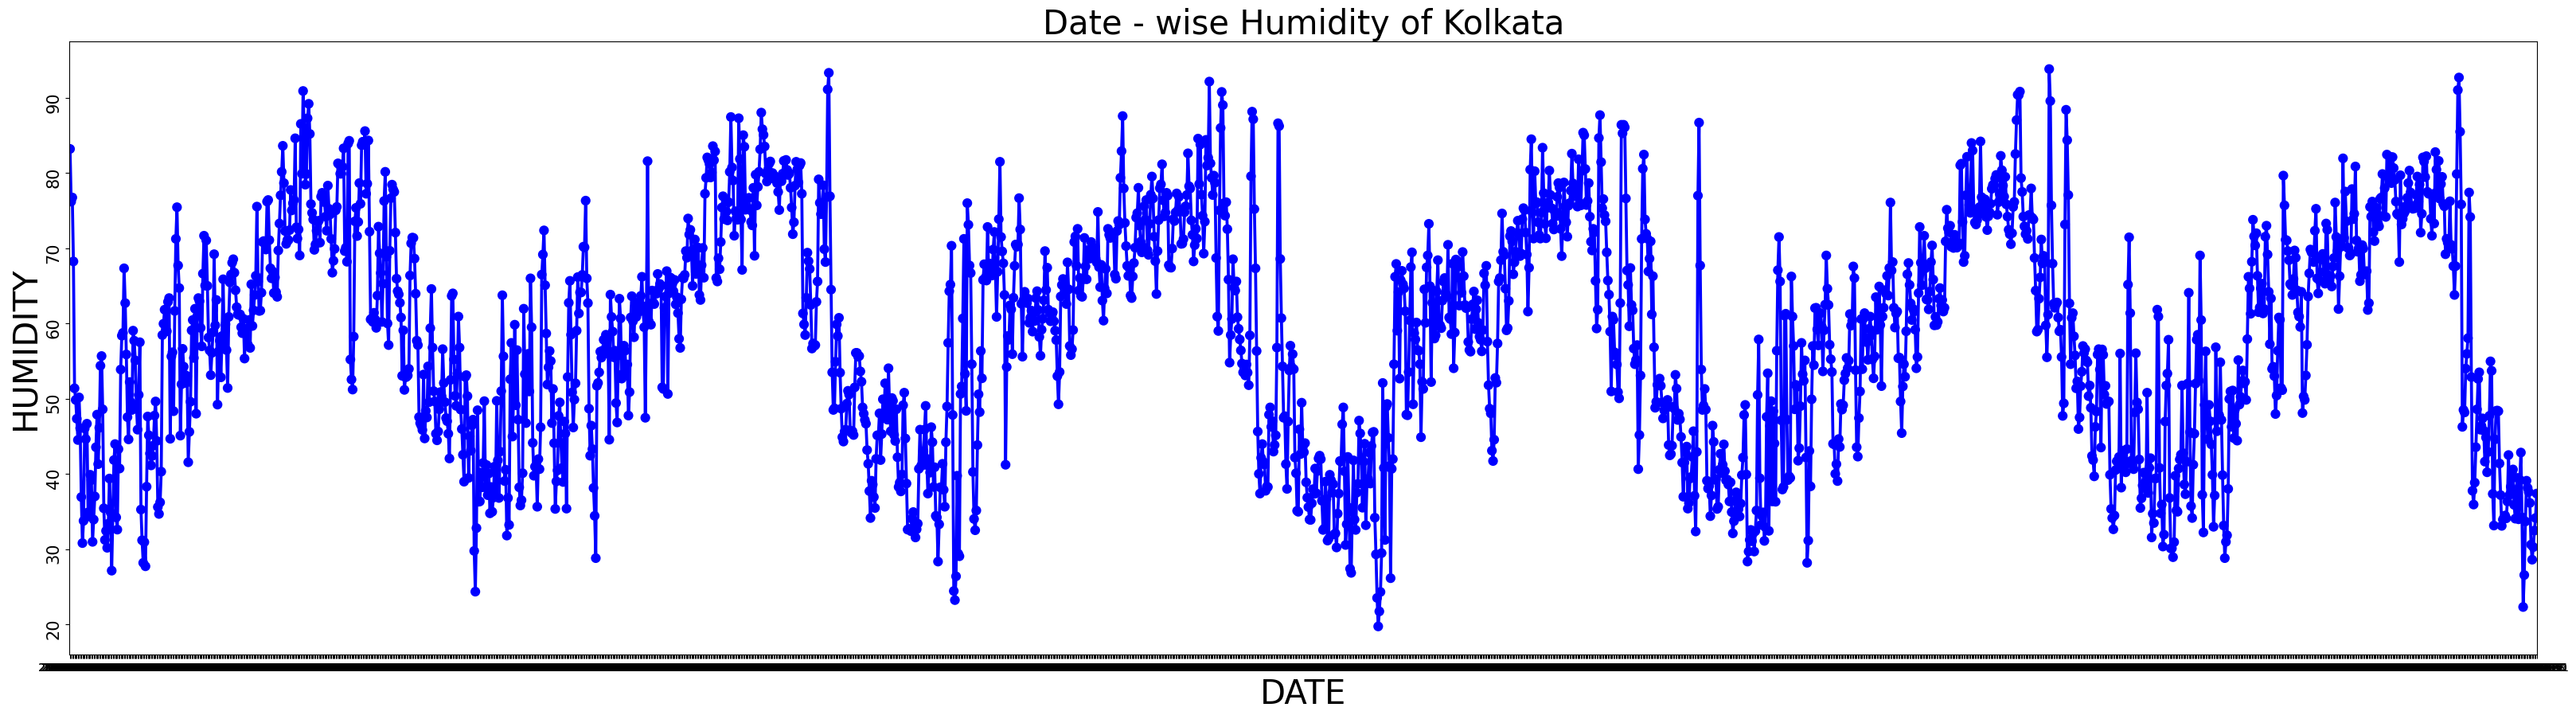

In [29]:
plt.figure(figsize=(40,10))
plt.yticks(rotation = 90,fontsize=15)
plt.xlabel("DATE",fontsize=30)
plt.ylabel("HUMIDITY",fontsize=30)

plt.title("Date - wise Humidity of Kolkata",fontsize=30)

ax = sns.pointplot(x=datewise_df['DATE'].dt.date, y=datewise_df['HUMIDITY'], color='b')
ax.set(xlabel="DATE", ylabel="HUMIDITY")

plt.show()

**Scatter Plot**

In [30]:
figure = px.scatter(data_frame=datewise_df, x="HUMIDITY", y="TEMPERATURE",
                    trendline="ols",
                    title="Relationship Between Temperature and Humidity",
                    color_discrete_sequence=['red'])
figure.update_traces(line=dict(color='green'))
figure.show()

**Inference :**


A relatively favourable association between temperature and humidity is shown in the graph.

**Fetching Year and month from the date**

In [31]:
datewise_df['Year'] = datewise_df["DATE"].dt.year
datewise_df["Month"] = datewise_df["DATE"].dt.month

In [32]:
datewise_df.head()

,DATE,TEMPERATURE,HUMIDITY,Year,Month
0,2015-01-01,20.333333,83.208333,2015,1
1,2015-01-02,23.041667,76.208333,2015,1
2,2015-01-03,24.375000,76.750000,2015,1
3,2015-01-04,23.916667,68.250000,2015,1
4,2015-01-05,21.250000,51.375000,2015,1


**Plotting changes in temparature over years 2015 - 2020**

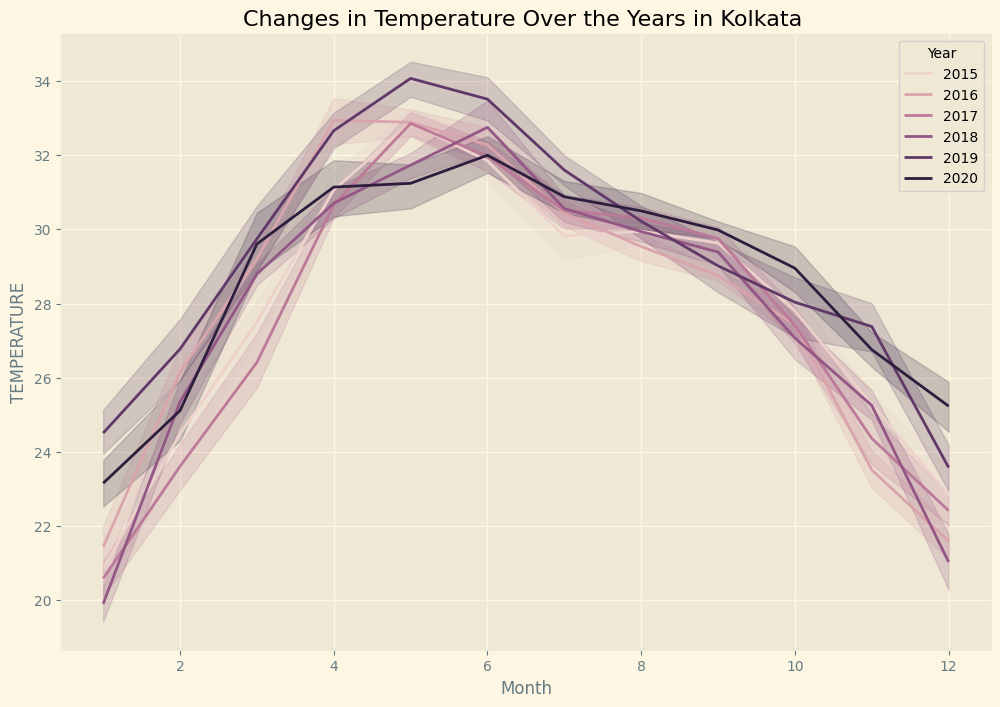

In [33]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12, 8))
plt.title("Changes in Temperature Over the Years in Kolkata ")
sns.lineplot(data = datewise_df, x='Month', y='TEMPERATURE', hue='Year')
plt.show()

**Plotting changes in humidity over years 2015 - 2020**

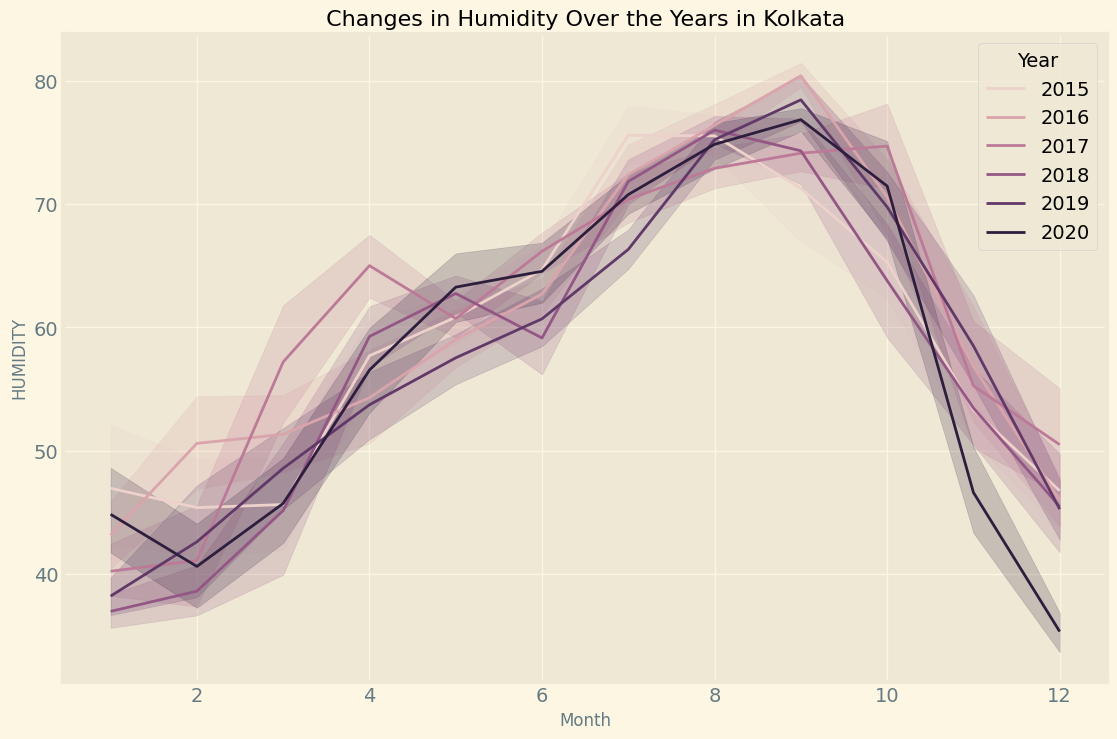

In [61]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12, 8))
plt.title(" Changes in Humidity Over the Years in Kolkata ")
sns.lineplot(data = datewise_df, x='Month', y='HUMIDITY', hue='Year')
plt.show()

**Inferences:**

It is clear that Kolkata saw lower temperatures and humidity in 2020 than in earlier years.

**PREDICT TEMPARATURE USING PROPHET**

**Data Pre-Processing**

In [35]:
forecast_df = datewise_df.rename(columns = {"DATE": "ds",
                                       "TEMPERATURE": "y"})

In [36]:
forecast_df.head()

,ds,y,HUMIDITY,Year,Month
0,2015-01-01,20.333333,83.208333,2015,1
1,2015-01-02,23.041667,76.208333,2015,1
2,2015-01-03,24.375000,76.750000,2015,1
3,2015-01-04,23.916667,68.250000,2015,1
4,2015-01-05,21.250000,51.375000,2015,1


In [37]:
forecast_temperature_df = forecast_df.drop(['HUMIDITY', 'Year', 'Month'], axis = 1)

In [38]:
forecast_temperature_df.head()

,ds,y
0,2015-01-01,20.333333
1,2015-01-02,23.041667
2,2015-01-03,24.375000
3,2015-01-04,23.916667
4,2015-01-05,21.250000


**Importing necessary libraries**

In [39]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

In [40]:
model_t = Prophet()

In [41]:
model_t.fit(forecast_temperature_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiyw6wzes/7v7r5f6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiyw6wzes/q962n0ql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64003', 'data', 'file=/tmp/tmpiyw6wzes/7v7r5f6y.json', 'init=/tmp/tmpiyw6wzes/q962n0ql.json', 'output', 'file=/tmp/tmpiyw6wzes/prophet_modelz595ryec/prophet_model-20230820181723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:17:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [42]:
forecasts_t = model_t.make_future_dataframe(periods=365)

In [43]:
predictions_t = model_t.predict(forecasts_t)

In [44]:
fig_t = plot_plotly(model_t, predictions_t)

In [45]:
fig_t.update_layout(title="Temperature Forecast using Prophet")
fig_t.show()

**Model evaluation using RMSE and MAE**

In [46]:
actual_temp_values = forecast_temperature_df['y'].values

predicted_temp_values = predictions_t['yhat'].values[:len(actual_temp_values)]

rmse = np.sqrt(mean_squared_error(actual_temp_values, predicted_temp_values))
mae = mean_absolute_error(actual_temp_values, predicted_temp_values)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 1.5085283468517947
Mean Absolute Error (MAE): 1.1313167776917954


Inference:

1. The RMSE value of 1.51 shows that the predicted values from the model are typically 1.51 units off from the actual values. This low score shows that the model's forecasts typically match the measured data quite well.

2. The absolute difference between the anticipated and actual values is typically around 1.13 units, according to the MAE value of 1.13. Better forecast accuracy is indicated by a lower MAE.


3. The low RMSE and MAE values imply that the model's predictions are precise and deviate from the actual values very slightly. This shows that the model and the data are well matched, and the model is probably doing a good job of forecasting the desired variable.

In [47]:
forecast_humidity_df = datewise_df[['DATE','HUMIDITY']]

In [48]:
forecast_humidity_df.head()

,DATE,HUMIDITY
0,2015-01-01,83.208333
1,2015-01-02,76.208333
2,2015-01-03,76.750000
3,2015-01-04,68.250000
4,2015-01-05,51.375000


In [49]:
forecast_humidity_df = forecast_humidity_df.rename(columns={"DATE" : "ds", "HUMIDITY": "y"})

In [50]:
forecast_humidity_df.head()

,ds,y
0,2015-01-01,83.208333
1,2015-01-02,76.208333
2,2015-01-03,76.750000
3,2015-01-04,68.250000
4,2015-01-05,51.375000


In [51]:
model_h = Prophet()

In [52]:
model_h.fit(forecast_humidity_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiyw6wzes/nzro6xge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiyw6wzes/vztskotb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3702', 'data', 'file=/tmp/tmpiyw6wzes/nzro6xge.json', 'init=/tmp/tmpiyw6wzes/vztskotb.json', 'output', 'file=/tmp/tmpiyw6wzes/prophet_modelsjef_bi2/prophet_model-20230820181725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
forecasts_h = model_h.make_future_dataframe(periods=365)

In [54]:
predictions_h = model_h.predict(forecasts_h)

In [55]:
fig_h = plot_plotly(model_h, predictions_h)

In [56]:
fig_h.update_layout(title="Humidity Forecast Using Prophet")
fig_h.show()

**Model evaluation using RMSE and MAE**

In [57]:
actual_humidity_values = forecast_humidity_df['y'].values

In [58]:
predicted_humidity_values = predictions_h['yhat'].values[:len(actual_humidity_values)]

In [59]:
rmse = np.sqrt(mean_squared_error(actual_humidity_values, predicted_humidity_values))
mae = mean_absolute_error(actual_humidity_values, predicted_humidity_values)

In [60]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 8.474606610835442
Mean Absolute Error (MAE): 6.310220106154463


**Inference:**

1. According to the RMSE value of 33.43, the predicted values typically differ from the actual values by about 33.43 units.

2. The MAE value of 30.71 shows that, on average, there are about 30.71 units between the expected and actual values.

3. The results show that the model's predictions are to a certain extent correct, but there may be opportunity for development to further minimise the mistakes.